# 스터디 4주차 : Clustering

- [Kaggle : Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- [Kaggle Clone Coding Notebook](https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis#Clustering-Analysis)

In [3]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os

In [31]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

In [32]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# describing the data

desc = ff.create_table(data.describe())
py.iplot(desc)

----

In [6]:
# checking if there is any NULL data

data.isnull().any().any()

False

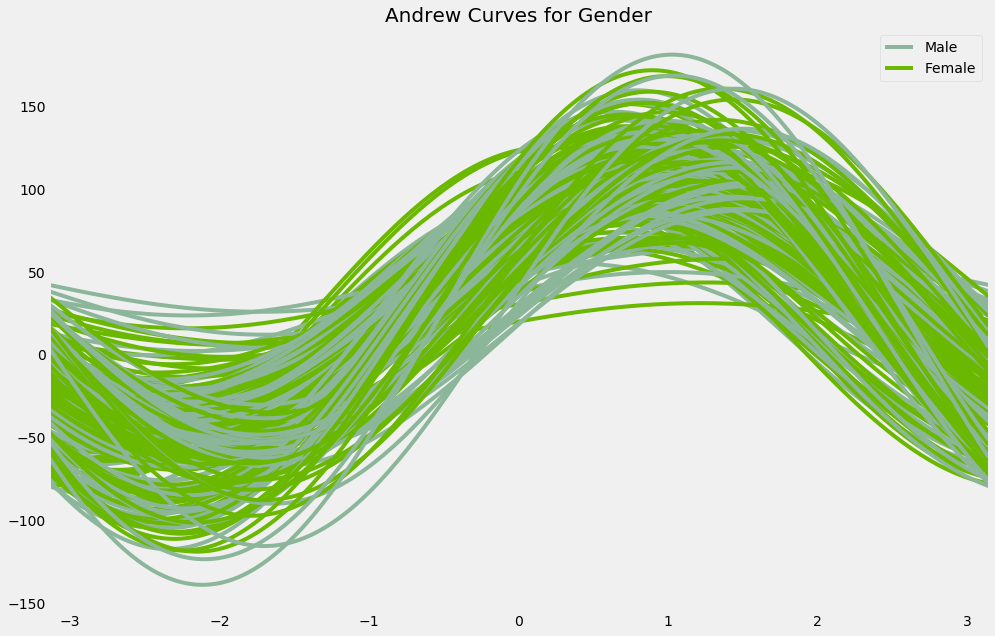

In [7]:
plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")  #CustomerID를 제외한 데이터의 행을 Gender를 기준으로 grouping 된다!
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

#### - 앤드류스 곡선  
    : 다차원 데이터를 시각화하는 방법으로, 평균/거리/분산을 보존할 수 있으며 서로 가깝게 표현되는 곡선의 경우 해당 데이터 포인트도 가깝다는 것을 의미한다.

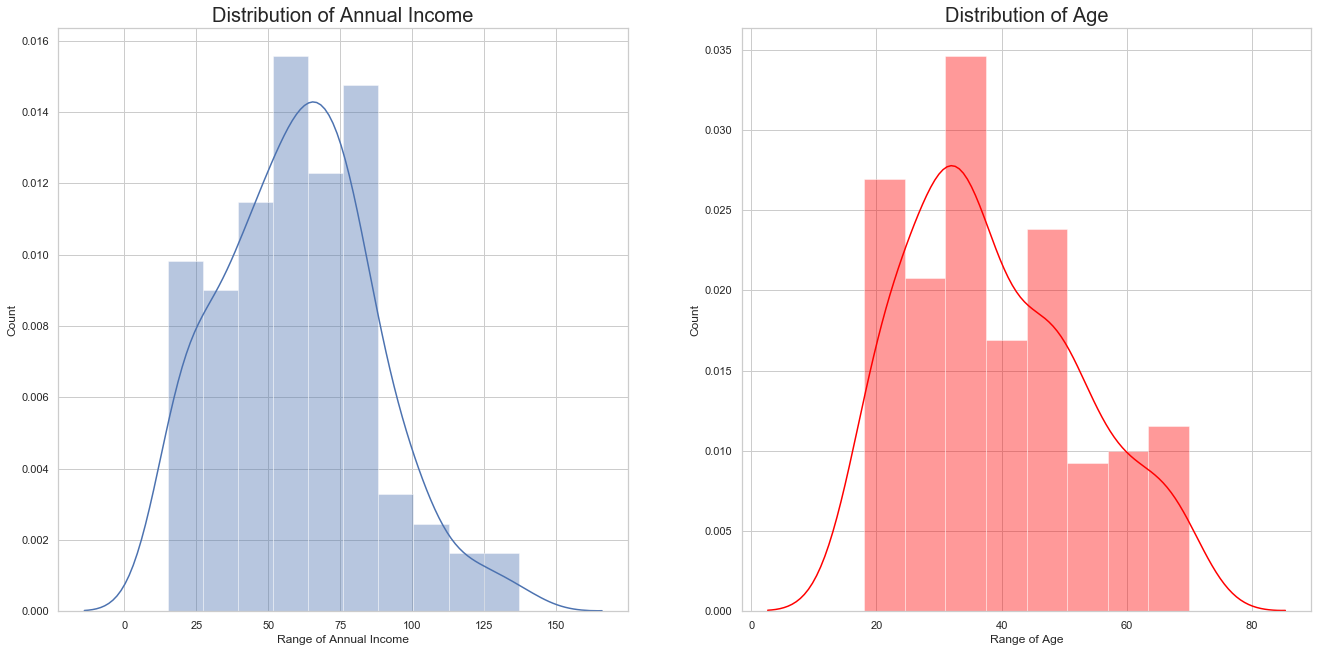

In [10]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

#### 연간 수입에 대한 분포  
    약 100달러 이상 버는 사람은 극소수이며, 대부분이 50-75달러의 소득을 낸다.  
    
#### 연령대의 분포  
    30-35세의 연령대가 가장 단골이 많으며, 노인의 방문은 적은 편이다. 

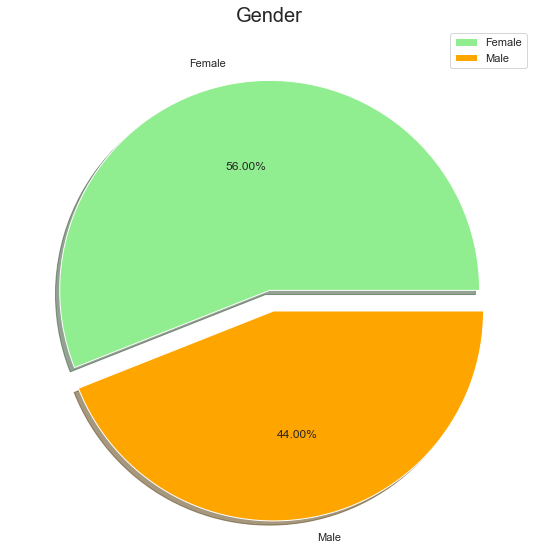

In [11]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### 성별의 분포
    남여 비율 차이가 크게 나지 않으나, 여성의 방문율이 조금 더 높다.

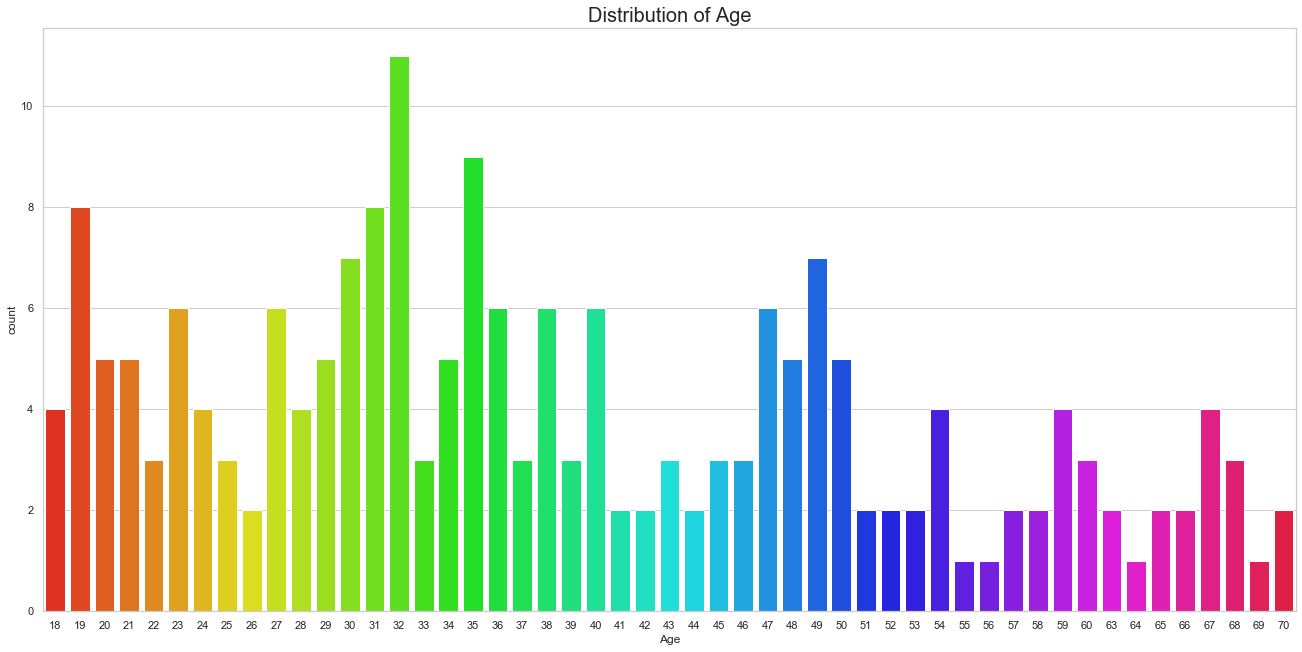

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

#### 나이의 분포
    32세가 가장 많이 방문하며, 27-39세의 사람들의 방문 빈도가 높다.  
    18세의 방문율 = 67세의 방문율이며, 55/56/69/64세의 방문율이 가장 낮다.

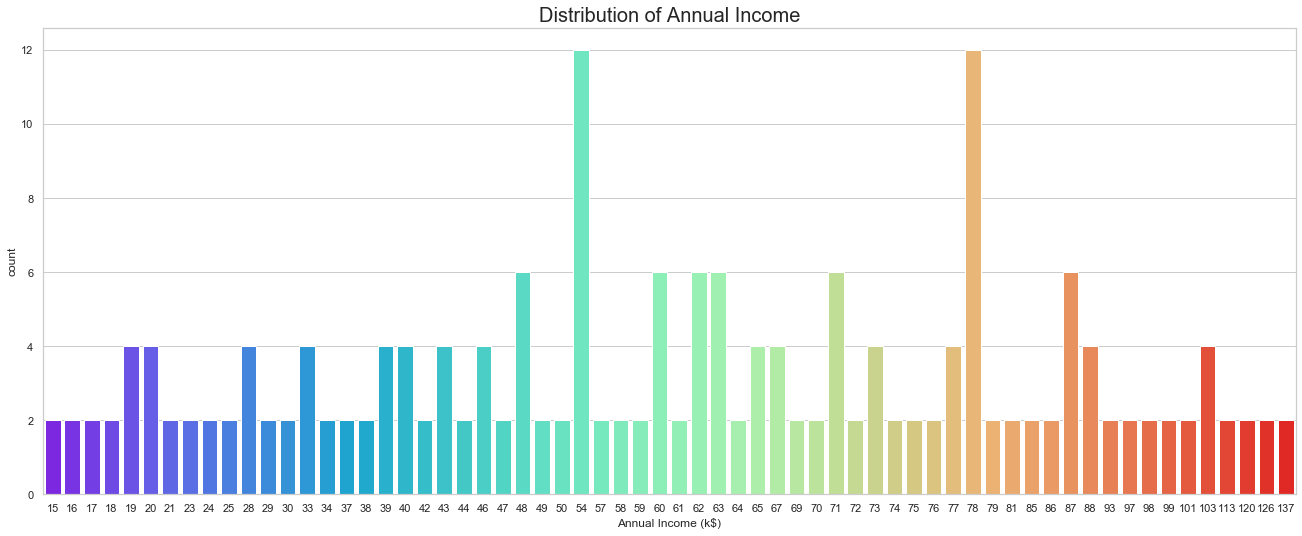

In [14]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

#### 연간 소득의 분포
    15에서 137 달러 사이에 비슷한 빈도를 가진 고객들이 존재한다.  
    54/78 달러를 연간 소득으로 지닌 고객의 방문율이 가장 높다.

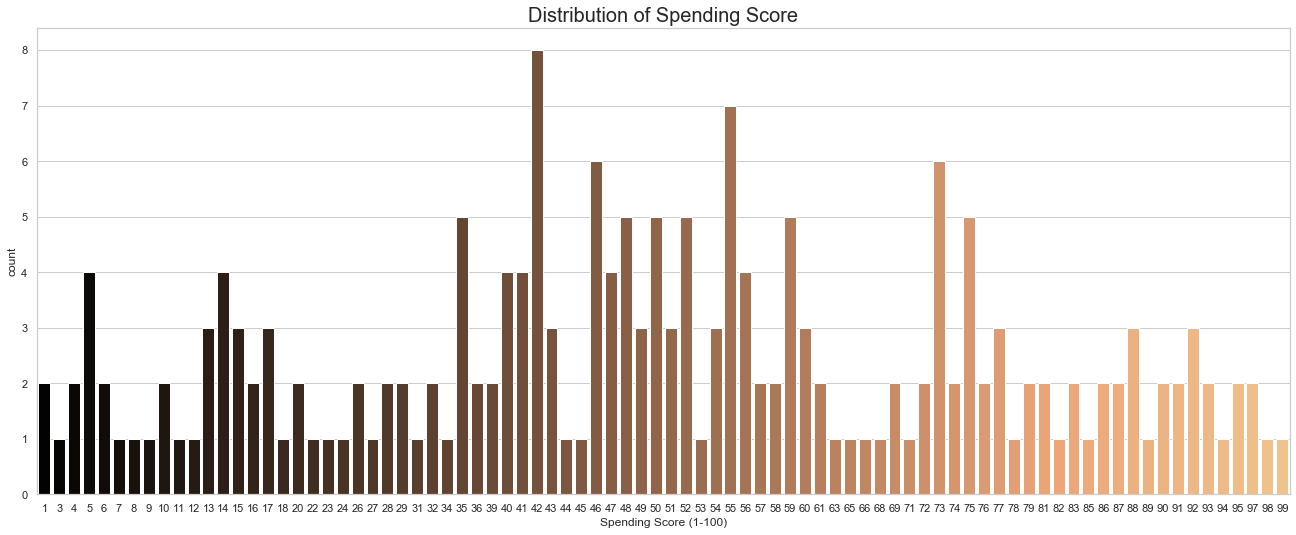

In [15]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

#### 쇼핑몰 방문 고객의 지출 점수 분포
    대부분의 고객은 35-60 범위의 지출 점수를 지니고 있으나, 극단적으로 1과 99의 점수를 받은 고객 역시 존재한다. 이를 통해, 쇼핑몰이 다양한 고객층을 대상으로 함을 알 수 있다. 

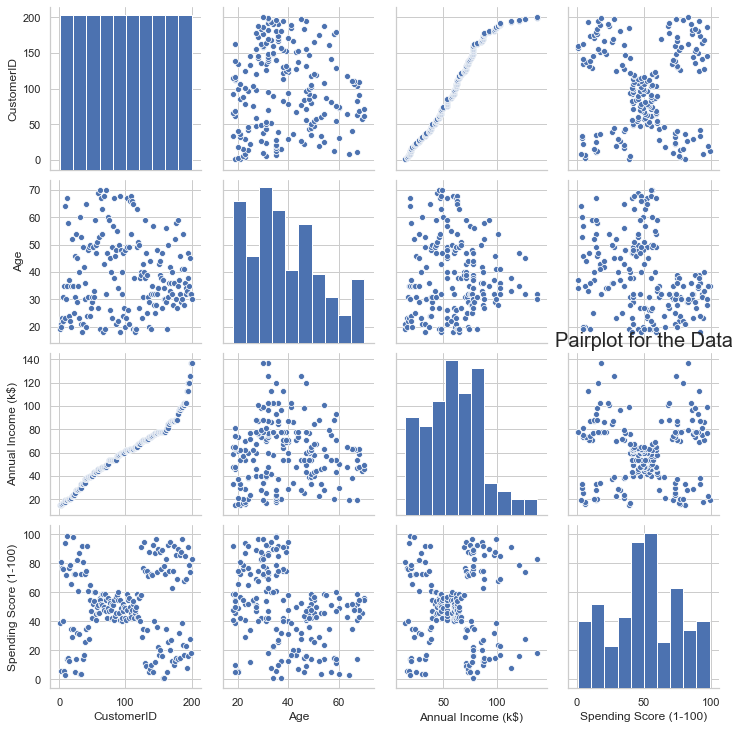

In [16]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

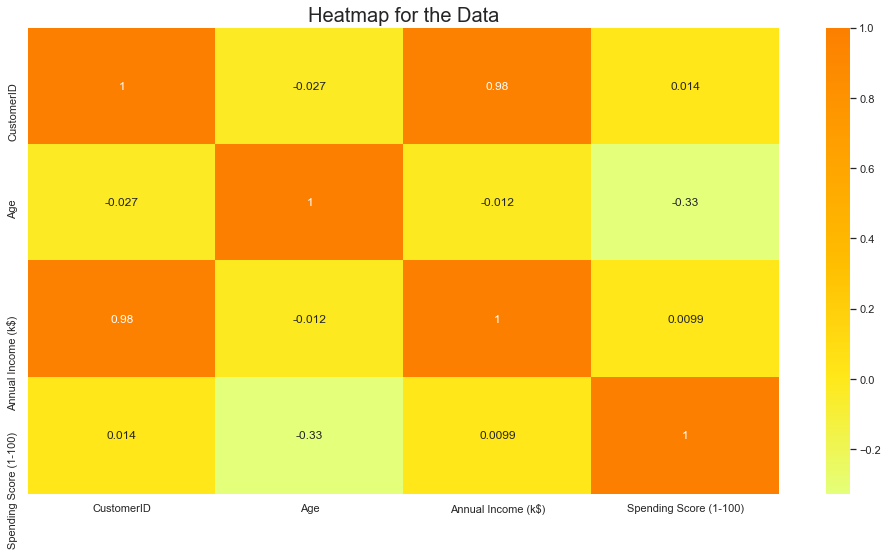

In [17]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

변수 간의 상관관계를 살펴본 결과, 유의한 상관관계가 보이지 않으므로 다중 공선성을 고려할 필요가 없다.

#### boxen plot
    violin, box plot과 비교했을 때, 데이터의 분포를 좀 더 쉽게 확인할 수 있다. (분포를 너비로 표시)
    
![plot 비교](https://i.stack.imgur.com/AlU0Q.png)

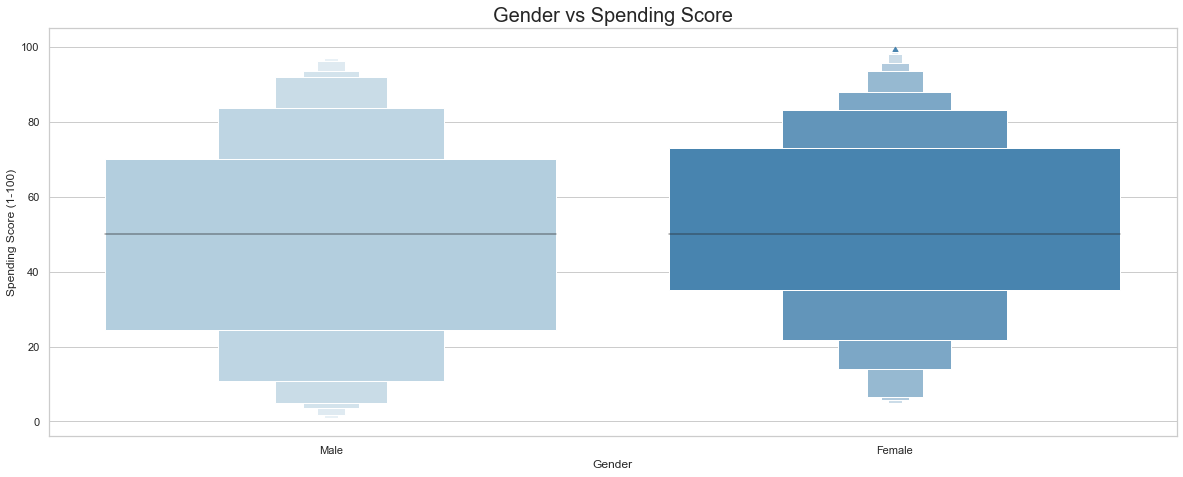

In [19]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

#### 성별에 따른 소비 점수의 분포
    남성 (25만 ~ 70만) < 여성 (35만 ~ 75만)  
    남성보다 여성의 소비 점수가 전체적으로 높다 - 여성이 shopping leader  

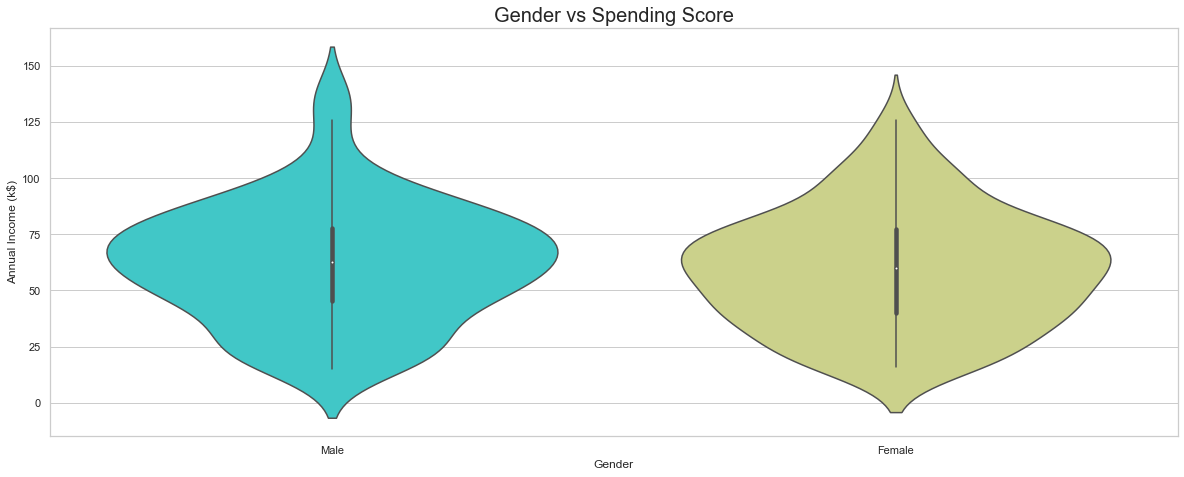

In [20]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

#### 성별에 따른 연간 소득의 분포
    여성에 비해 남성 고소득자가 많다.  
    저소득자의 경우 여성과 남성 모두 동일하다.

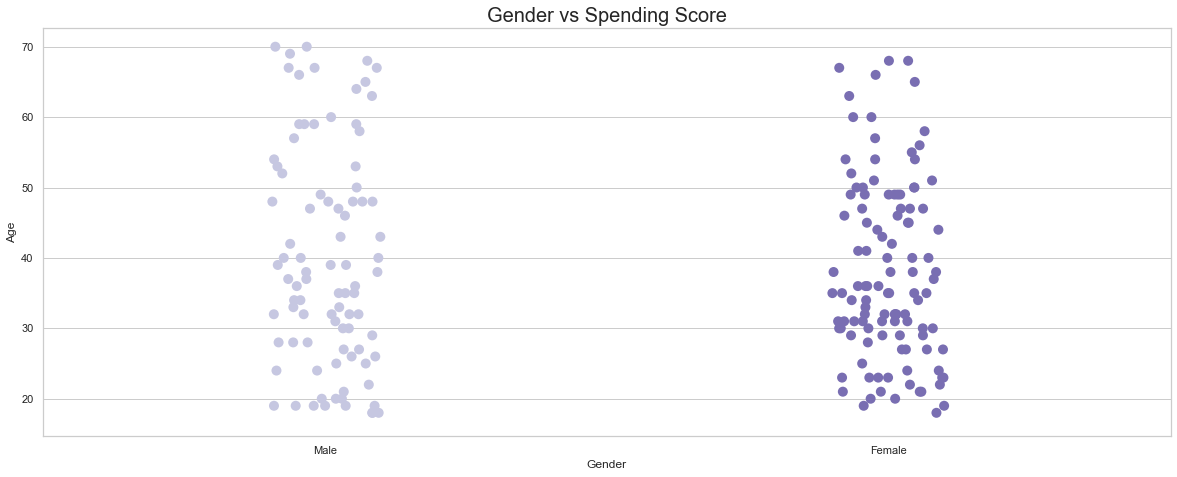

In [21]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

#### stripplot
    모든 데이터의 카테고리 별 분포를 scatter plot처럼 점으로 확인할 수 있다.  
    이때, 데이터를 나타내는 점이 겹치지 않도록 옆으로 퍼지는 plot = swarmplot

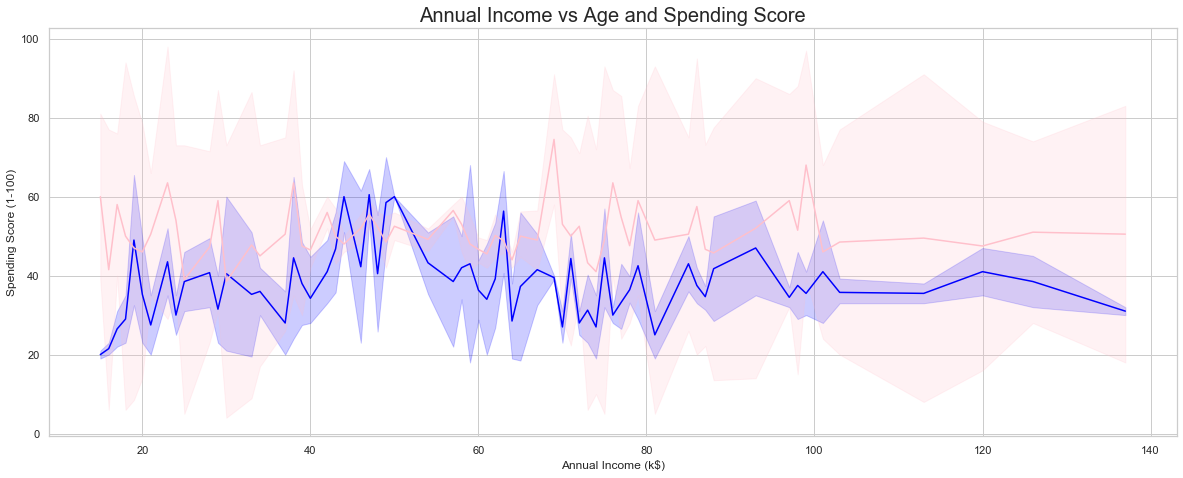

In [22]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

#### 연간 소득에 따른 나이와 소비 점수의 분포
    1. 연간 소득에 따른 나이의 분포 (파란색)
    2. 연간 소득에 따른 소비 점수의 분포 (빨간색)

---
## Clustering
### A. income 기반

In [23]:
x = data.iloc[:, [3, 4]].values  #income, spending score

# let's check the shape of x
print(x.shape)

(200, 2)


### 1. Kmeans Algorithm

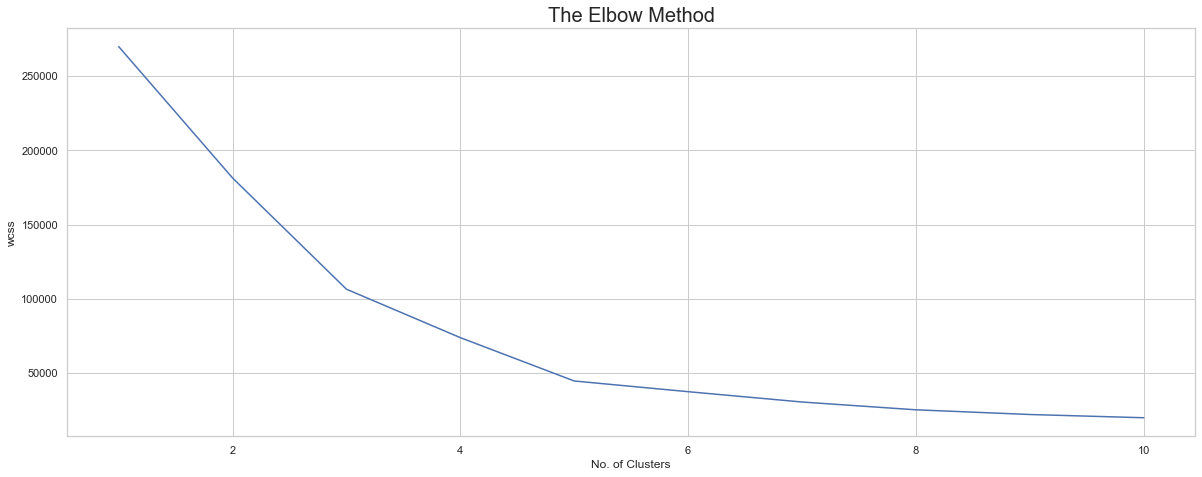

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

    Elbow method (확 꺾이는 지점 = n clusters) >> n_cluster = 5

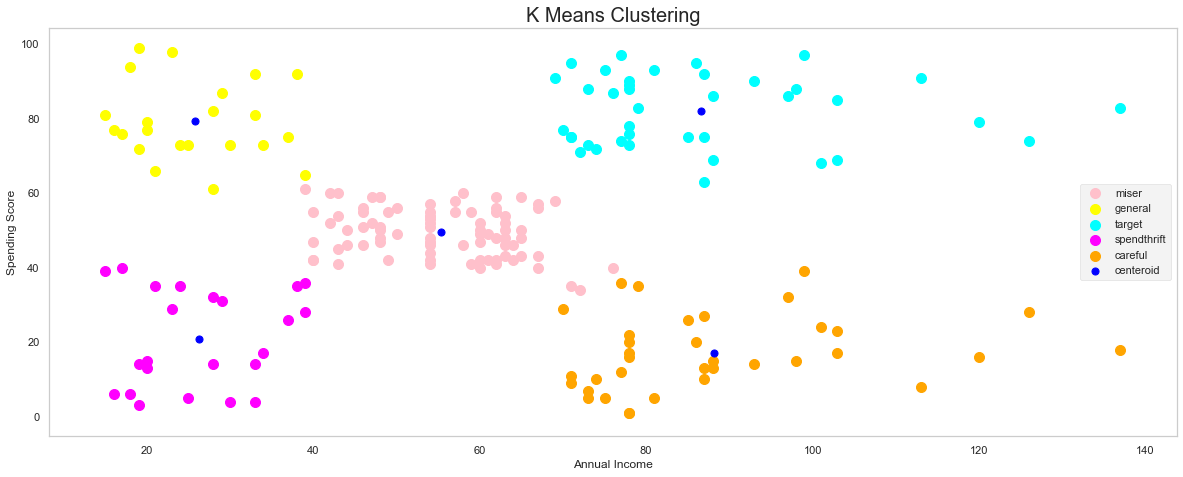

In [25]:
#시각화
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

    파란색 점들은 군집의 중심 (centeroid)
---
### 2. Hierarchial Clustering

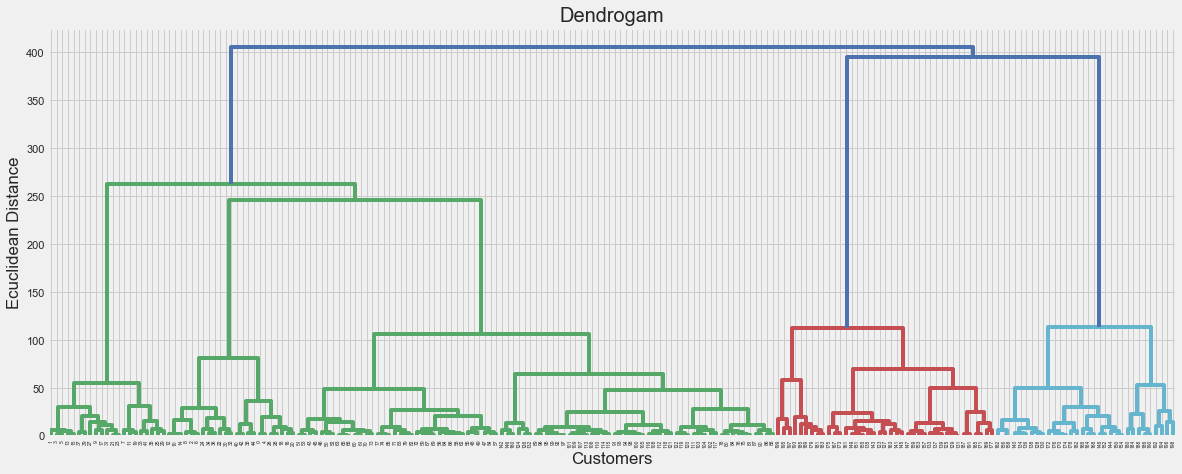

In [26]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

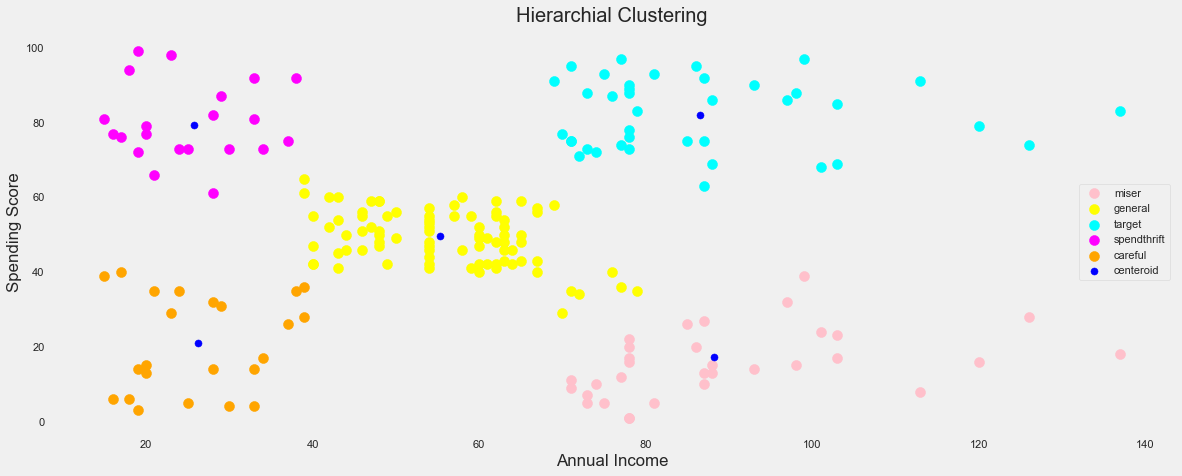

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

---
### B. Age 기반

In [33]:
x = data.iloc[:, [2, 4]].values  #age, spending score
x.shape

(200, 2)

### 1. Kmeans Clustering

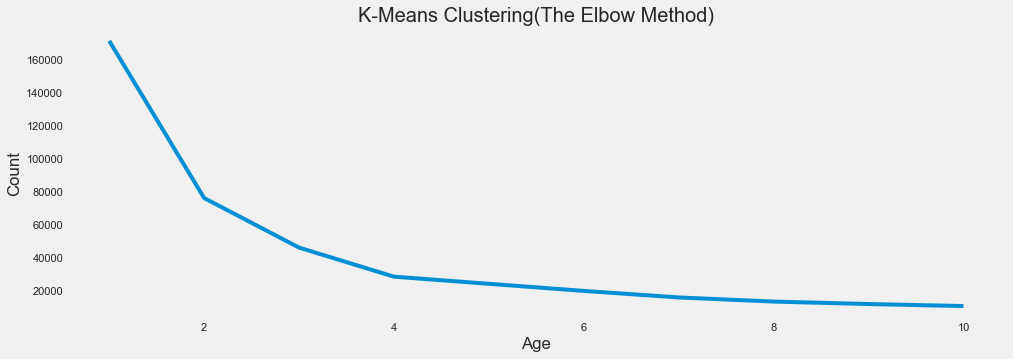

In [29]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

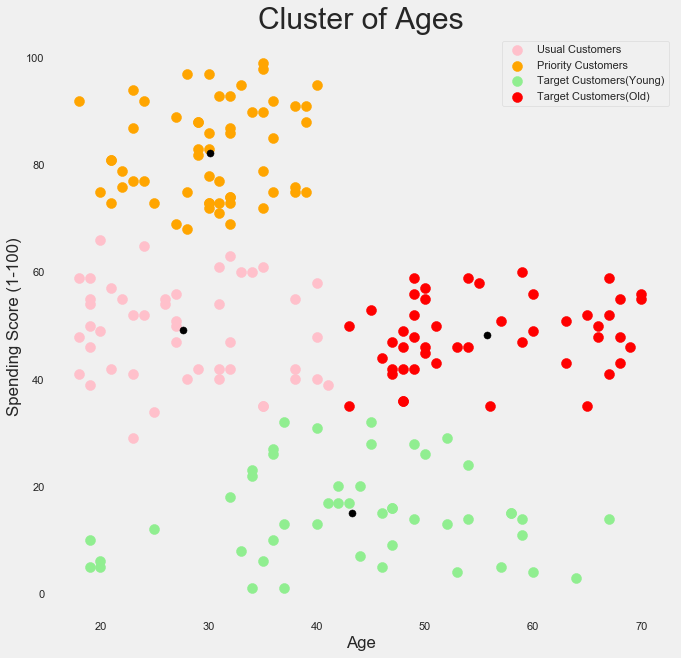

In [35]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

    고객의 연령에 따른 소비 점수의 clustering을 확인할 결과, 보통/우선/노인 대상/젊은 고객의 범주로 나눌수 있다.

In [36]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [37]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)